In [28]:
import pandas as pd
import nsfg
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import numpy as np
%matplotlib inline

In [29]:
df=nsfg.ReadFemPreg()

In [30]:
df.size

3316692

In [31]:
df.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [32]:
len(df.columns)

244

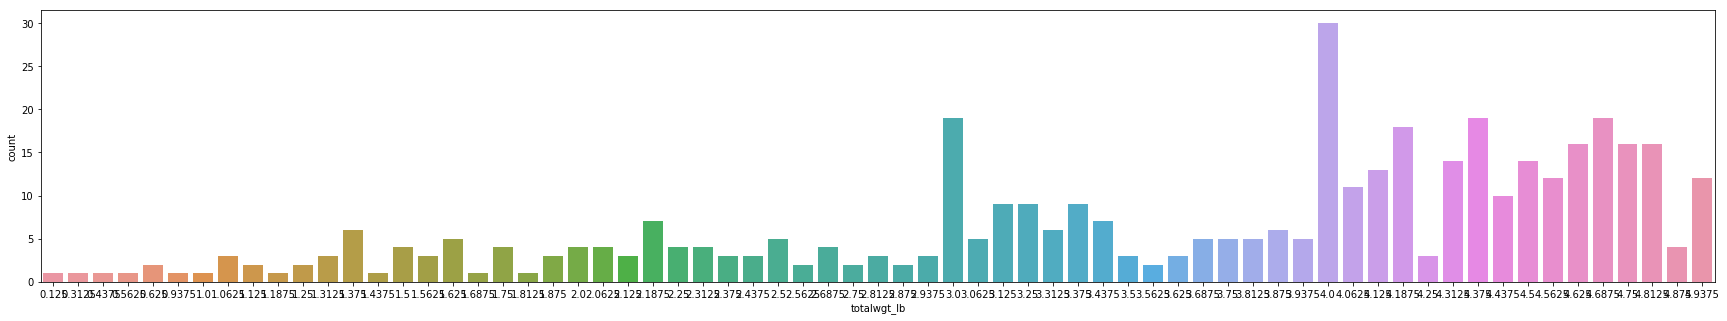

In [33]:

plt.figure(figsize=(30,5))
sns.countplot(x='totalwgt_lb',data=df[df['totalwgt_lb']<5 ])

In [34]:
df['outcome'].unique()

array([1, 2, 4, 5, 3, 6])

In [35]:
live=df[df['outcome']==1]

live_df=live.dropna(axis=1,how='all')

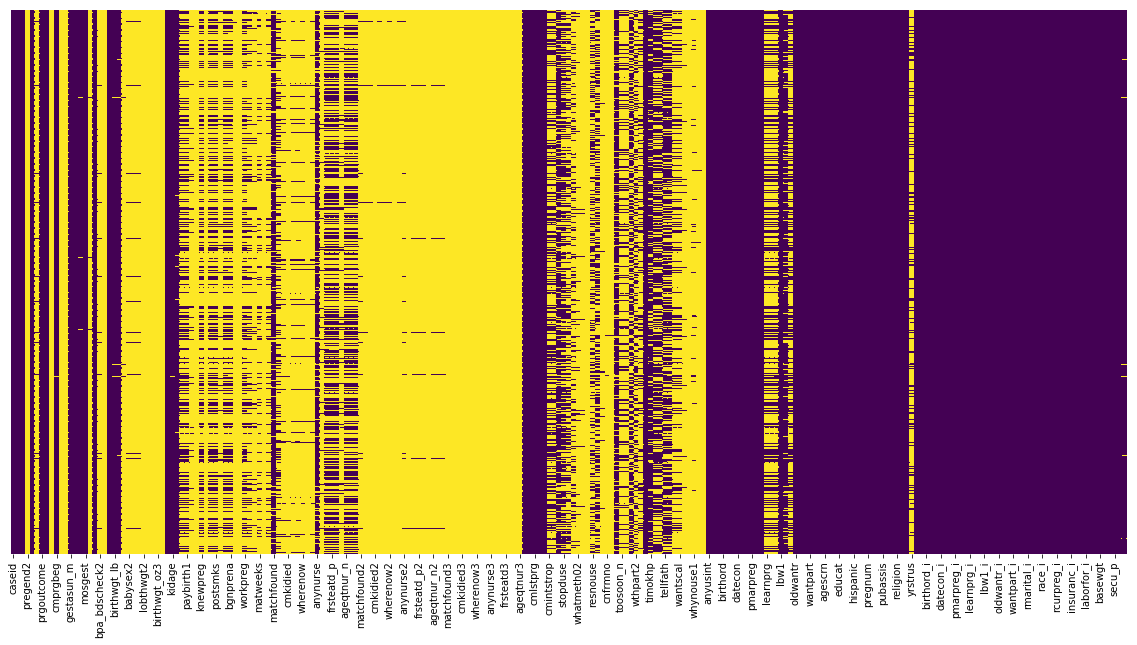

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(data=live_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
len(live_df.columns)

231

In [38]:
type(live_df)

pandas.core.frame.DataFrame

In [39]:
live_df=live_df[pd.notnull(live_df['totalwgt_lb'])]

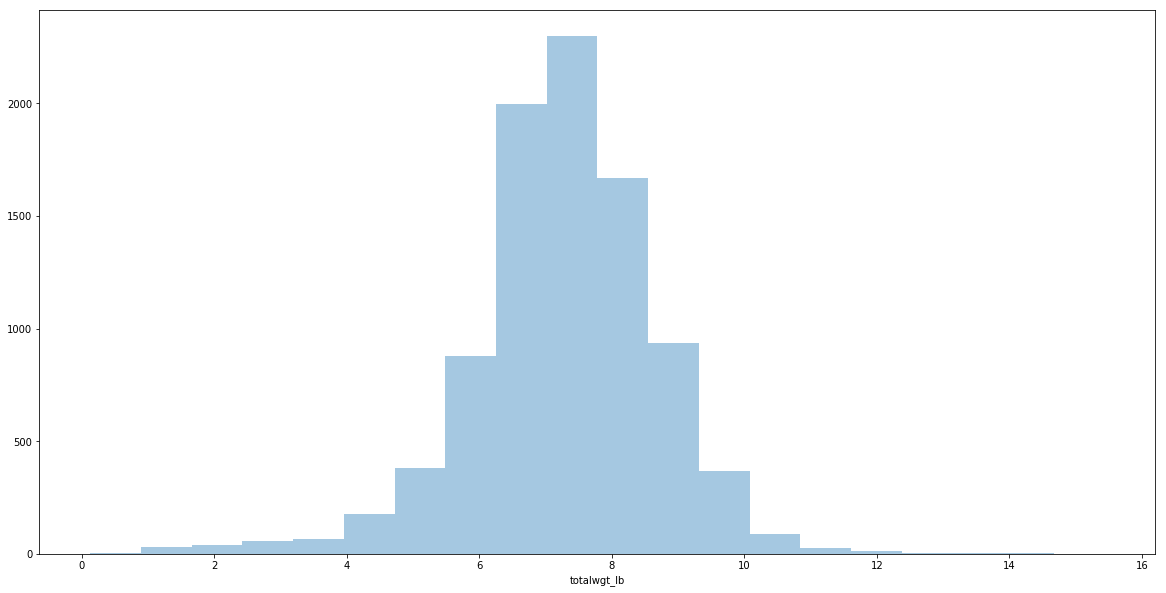

In [40]:
#Distribution of baby weight
plt.figure(figsize=(20,10))
sns.distplot(a=live_df['totalwgt_lb'],kde=False,bins=20)

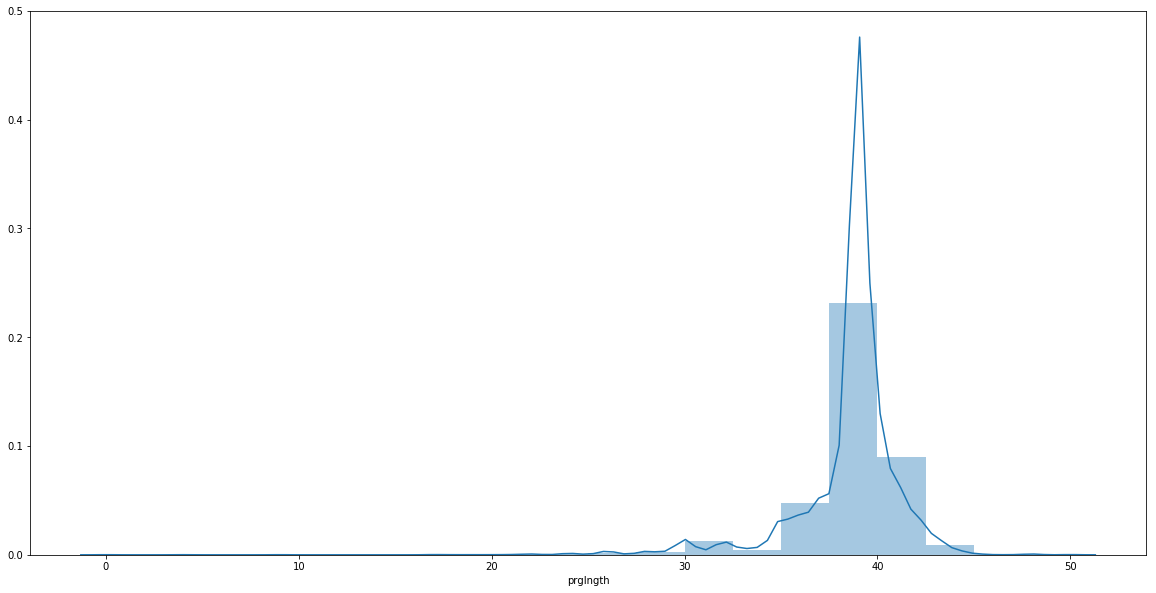

In [41]:
#Distributon of pregnenacy duration
plt.figure(figsize=(20,10))
sns.distplot(a=live_df['prglngth'],bins=20)

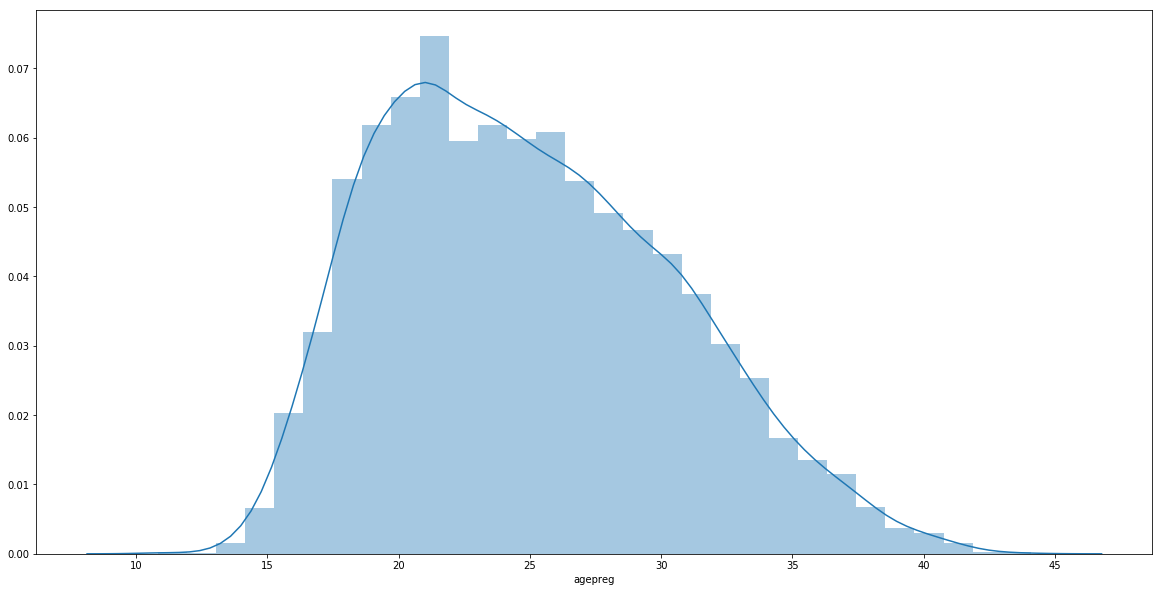

In [42]:
#Distribution of mother's age during pregnancy
plt.figure(figsize=(20,10))
sns.distplot(a=live_df['agepreg'],bins=30)

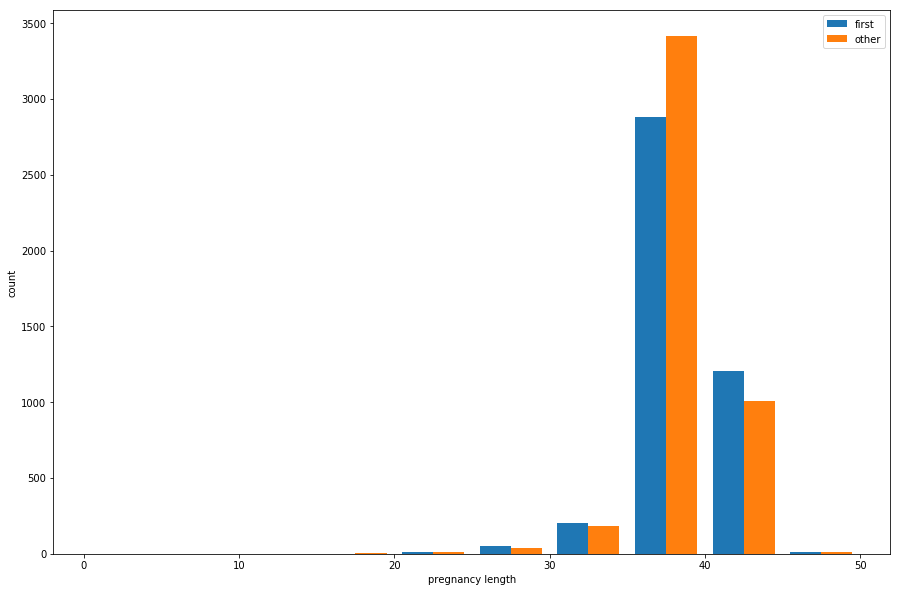

In [43]:
plt.figure(figsize=(15,10))
birth1=live_df[live_df['birthord']==1]['prglngth']
birth_other=live_df[live_df['birthord']!=1]['prglngth']
plt.hist([birth1,birth_other],label=['first','other'])
plt.legend()
plt.xlabel('pregnancy length')
plt.ylabel('count')
plt.show()

In [44]:
live_df['prglngth'].mean()

38.57059083868113

In [45]:
live_df['prglngth'].var()

7.221031652641523

In [46]:
live_df['prglngth'].std()

2.6871977323303775

In [47]:
#Mean pregnenacy period of first baby
birth1.mean()

38.60944304377722

In [48]:
#Mean pregnenacy period of other baby
birth_other.mean()

38.534331550802136

In [49]:
birth1.mean()

38.60944304377722

In [50]:
birth1.mean()-birth_other.mean()

0.07511149297508268

In [51]:
#Calculating effect size using cohen's d method
def calculate_effect_size(group1,group2):
    mean1=group1.mean()
    mean2=group2.mean()
    sd1=group1.std()
    sd2=group2.std()
    pooled_stf=math.sqrt(((sd1**2)-(sd2**2))/2)
    effect_size=(mean1-mean2)/pooled_stf
    return effect_size
    

In [57]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2-2)
    d = diff / np.sqrt(pooled_var)
    return d

In [58]:
calculate_effect_size(birth1,birth_other)

0.09966558021970423

In [59]:
CohenEffectSize(birth1,birth_other)

0.027952786808495476

# Using field "totalwgt_lb" to investigate the fact that first baby is lighter than second 

In [29]:
birth1_wt=live_df[live_df['birthord']==1]['totalwgt_lb']
other_birth_wt=live_df[live_df['birthord']!=1]['totalwgt_lb']
calculate_effect_size(birth1_wt,other_birth_wt)

-0.6475259123276575

# Investigating respondent data

In [30]:
birth1_wt.mean()

7.201094430437772

In [31]:
other_birth_wt.mean()

7.325855614973262

In [ ]:
resp = nsfg.ReadFemResp()

In [ ]:
resp.size

In [ ]:
resp.columns

In [ ]:
resp.info()

In [ ]:
resp.head(10)

In [ ]:
sns.distplot(a=resp['totincr'],kde=False)

In [ ]:
plt.hist(resp['totincr'])

In [ ]:
sns.distplot(a=resp['ager'],kde=False)

In [ ]:
sns.distplot(a=resp['numfmhh'],kde=False)

In [ ]:
sns.distplot(a=resp['parity'],kde=False)

In [ ]:

resp['parity'].value_counts(sort=True)

In [36]:
#Sorted result based on index
resp['parity'].value_counts().sort_index()

0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: parity, dtype: int64

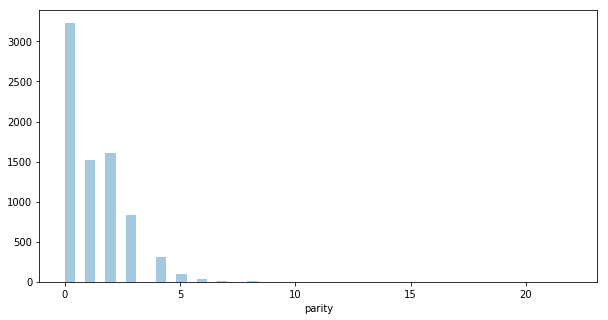

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(a=resp['parity'],kde=False)

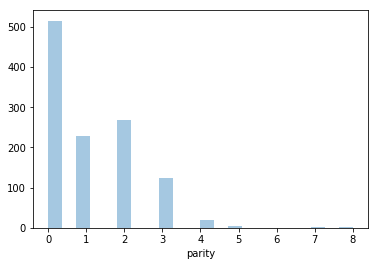

In [89]:
rich_parity=resp[resp['totincr']==14]['parity']
not_rich_parity=resp[resp['totincr']<14]['parity']
sns.distplot(a=rich_parity,kde=False)

In [87]:
rich_parity.value_counts()

0    515
2    267
1    229
3    123
4     19
5      5
8      1
7      1
Name: parity, dtype: int64

In [88]:
rich_parity.value_counts().sort_index(ord

0    515
1    229
2    267
3    123
4     19
5      5
7      1
8      1
Name: parity, dtype: int64

In [92]:
calculate_effect_size(rich_parity,not_rich_parity)

ValueError: math domain error

In [91]:
CohenEffectSize(rich_parity,not_rich_parity)

-0.12511855314660367

In [95]:
rich_parity.std()**2

1.3833685400612898

In [96]:
not_rich_parity.std()**2

2.0250210326269023